## Monthly Tropical Storm Genesis Locations

### Illustrates how to read the IBTRaCS database and plot the location of all  Tropical storms within a range of months


Ibtracs file found and opened


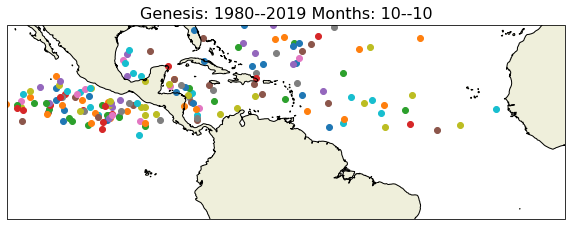

In [1]:
'''
Python For Atmospheric Science By Example
A. Aiyyer
North Carolina State University

'''

from matplotlib.dates import num2date,date2num
import xarray as xr
import numpy as np
import datetime as dt
import cftime as cf
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from   calendar import monthrange
import pandas as pd

#--------------------------------------------------
yearStart = 1980
yearEnd   = 2019

monthStart = 10
monthEnd   = 10
#--------------------------------------------------

dataDir  = "~/data100/data/ibtracs/"
filename = "IBTrACS.since1980.v04r00.nc"

file = dataDir+filename

try:
    ds = xr.open_dataset(file)
except:
    print ("file not found. quitting code")
    quit()
    
print ("Ibtracs file found and opened")


lats = ds.lat[:,0]
lons = ds.lon[:,0]
time = ds.time[:,0]


# TC location data is in lat lon. so we set the transform value as PlateCarre
# This will ensure that our points are correctly located on the map no matter
# what we choose for the central longitude 
#
data_crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-120,-5,-10,30], crs=ccrs.PlateCarree())
#ax.set_global()

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
titleString = "Genesis: " + str(yearStart) + "--" + str(yearEnd) + " Months: " + str(monthStart)+ "--" + str(monthEnd)
ax.set_title(titleString, fontsize=16)


im = monthStart
iy = yearStart
while iy < yearEnd+1:
    start_date = np.datetime64(dt.datetime(iy, monthStart, 1))
    end_date   = np.datetime64(dt.datetime(iy, monthEnd+1, 1))
    inds = np.where((time > start_date) & (time < end_date))[0] 
    ax.scatter(lons[inds],lats[inds],transform=data_crs)
    iy += 1

plt.savefig("figure.png") # save as png
